<a href="https://colab.research.google.com/github/kelebekkadircan/wineQuality_prediction/blob/main/MLWineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install imbalanced-learn scikit-learn


!pip install scikit-learn==1.0.2
!pip install imbalanced-learn==0.10.1



import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression , LogisticRegression
import matplotlib as plt
from sklearn.metrics import mean_squared_error , mean_absolute_error, mean_absolute_percentage_error, r2_score ,  classification_report
from sklearn.ensemble  import RandomForestRegressor , RandomForestClassifier
# ! pip install py3Dmol
# import py3Dmol
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE


from sklearn.neighbors import KNeighborsClassifier
#!pip install auto-sklearn
#!pip install tpot



# p = py3Dmol.view(query = 'mmtf:1ycr')
# p.setStyle({'cartoon' : {'color' : 'spectrum'} })

# rw = pd.read_csv("https://raw.githubusercontent.com/miconunogluali/Wine_Quality/main/winequality-red.csv")
rw = pd.read_csv("https://raw.githubusercontent.com/kelebekkadircan/wineQuality_prediction/main/winequality.csv?token=GHSAT0AAAAAACPQQCRIBPSDXVK75F2GATNWZSAYFQA")
rw = rw.drop("type" , axis = 1)
rw
rw.head(15)
# This code reads a CSV file from the URL specified with the "read_csv()" function using the pandas library.

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 0.12.2 requires scikit-learn>=1.4.1, but you have scikit-learn 1.0.2 which is incompatible.
bigframes 1.5.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


preprocessing

In [ ]:
rw.columns=["sabitasit","degiskenasit","sitrikasit","atikseker","klorur","serbestsulfur","totalsulfur","yogunluk","ph","sulfat","alkol","kalite"]
rw["kalite"] =  rw["kalite"].astype(float)
#  pd.to_numeric(rw["kalite"])
# rw["kalite"].astype(float)

# fill the missing values
for col, value in rw.items():
    if col != 'tip':
        rw[col] = rw[col].fillna(rw[col].mean())

print(rw)

y= rw[["kalite"]]
x= rw.drop(columns=["kalite"],axis=1)

# class ımbalancement
oversample = SMOTE(k_neighbors=4)

# transform the dataset
x, y = oversample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

rw

      sabitasit  degiskenasit  sitrikasit  atikseker  klorur  serbestsulfur  \
0           7.0         0.270        0.36       20.7   0.045           45.0   
1           6.3         0.300        0.34        1.6   0.049           14.0   
2           8.1         0.280        0.40        6.9   0.050           30.0   
3           7.2         0.230        0.32        8.5   0.058           47.0   
4           7.2         0.230        0.32        8.5   0.058           47.0   
...         ...           ...         ...        ...     ...            ...   
6492        6.2         0.600        0.08        2.0   0.090           32.0   
6493        5.9         0.550        0.10        2.2   0.062           39.0   
6494        6.3         0.510        0.13        2.3   0.076           29.0   
6495        5.9         0.645        0.12        2.0   0.075           32.0   
6496        6.0         0.310        0.47        3.6   0.067           18.0   

      totalsulfur  yogunluk    ph    sulfat  alkol 

,sabitasit,degiskenasit,sitrikasit,atikseker,klorur,serbestsulfur,totalsulfur,yogunluk,ph,sulfat,alkol,kalite
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


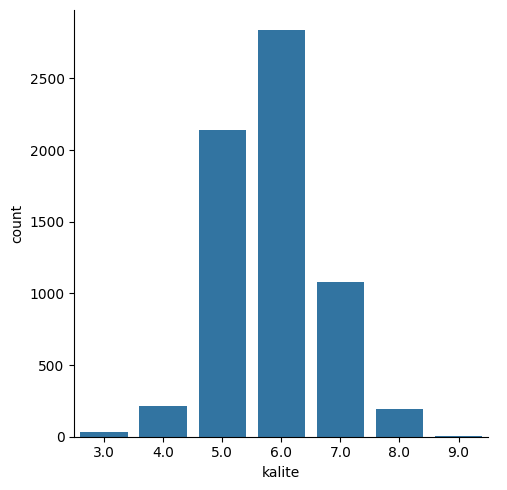

In [ ]:
# number of values for each quality
sns.catplot(x='kalite', data = rw, kind = 'count')

modelTraining

In [ ]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)

    y_lr_train_pred = model.predict(x_train)
    y_lr_test_pred = model.predict(x_test)


    lr_train_mse = mean_squared_error(y_train , y_lr_train_pred)
    lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred )
    lr_train_mape = mean_absolute_percentage_error(y_train, y_lr_train_pred)
    lr_train_r2 = r2_score(y_train , y_lr_train_pred)

    lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
    lr_test_mae = mean_absolute_error(y_test , y_lr_test_pred)
    lr_test_mape =  mean_absolute_percentage_error(y_test , y_lr_test_pred)
    lr_test_r2 = r2_score(y_test , y_lr_test_pred)

    lr_results = pd.DataFrame([  lr_train_mse,  lr_train_r2 , lr_test_mse ,  lr_test_r2]).transpose()
    lr_results.columns = [ 'Training MSE' , 'Training R2' , 'Test MSE' , 'Test R2']
    print(lr_results)

**dist plot show**

<ipython-input-5-2d64e9272940>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
<ipython-input-5-2d64e9272940>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
<ipython-input-5-2d64e9272940>:8: UserWarning: 

`distplot` is a deprecated function and will 

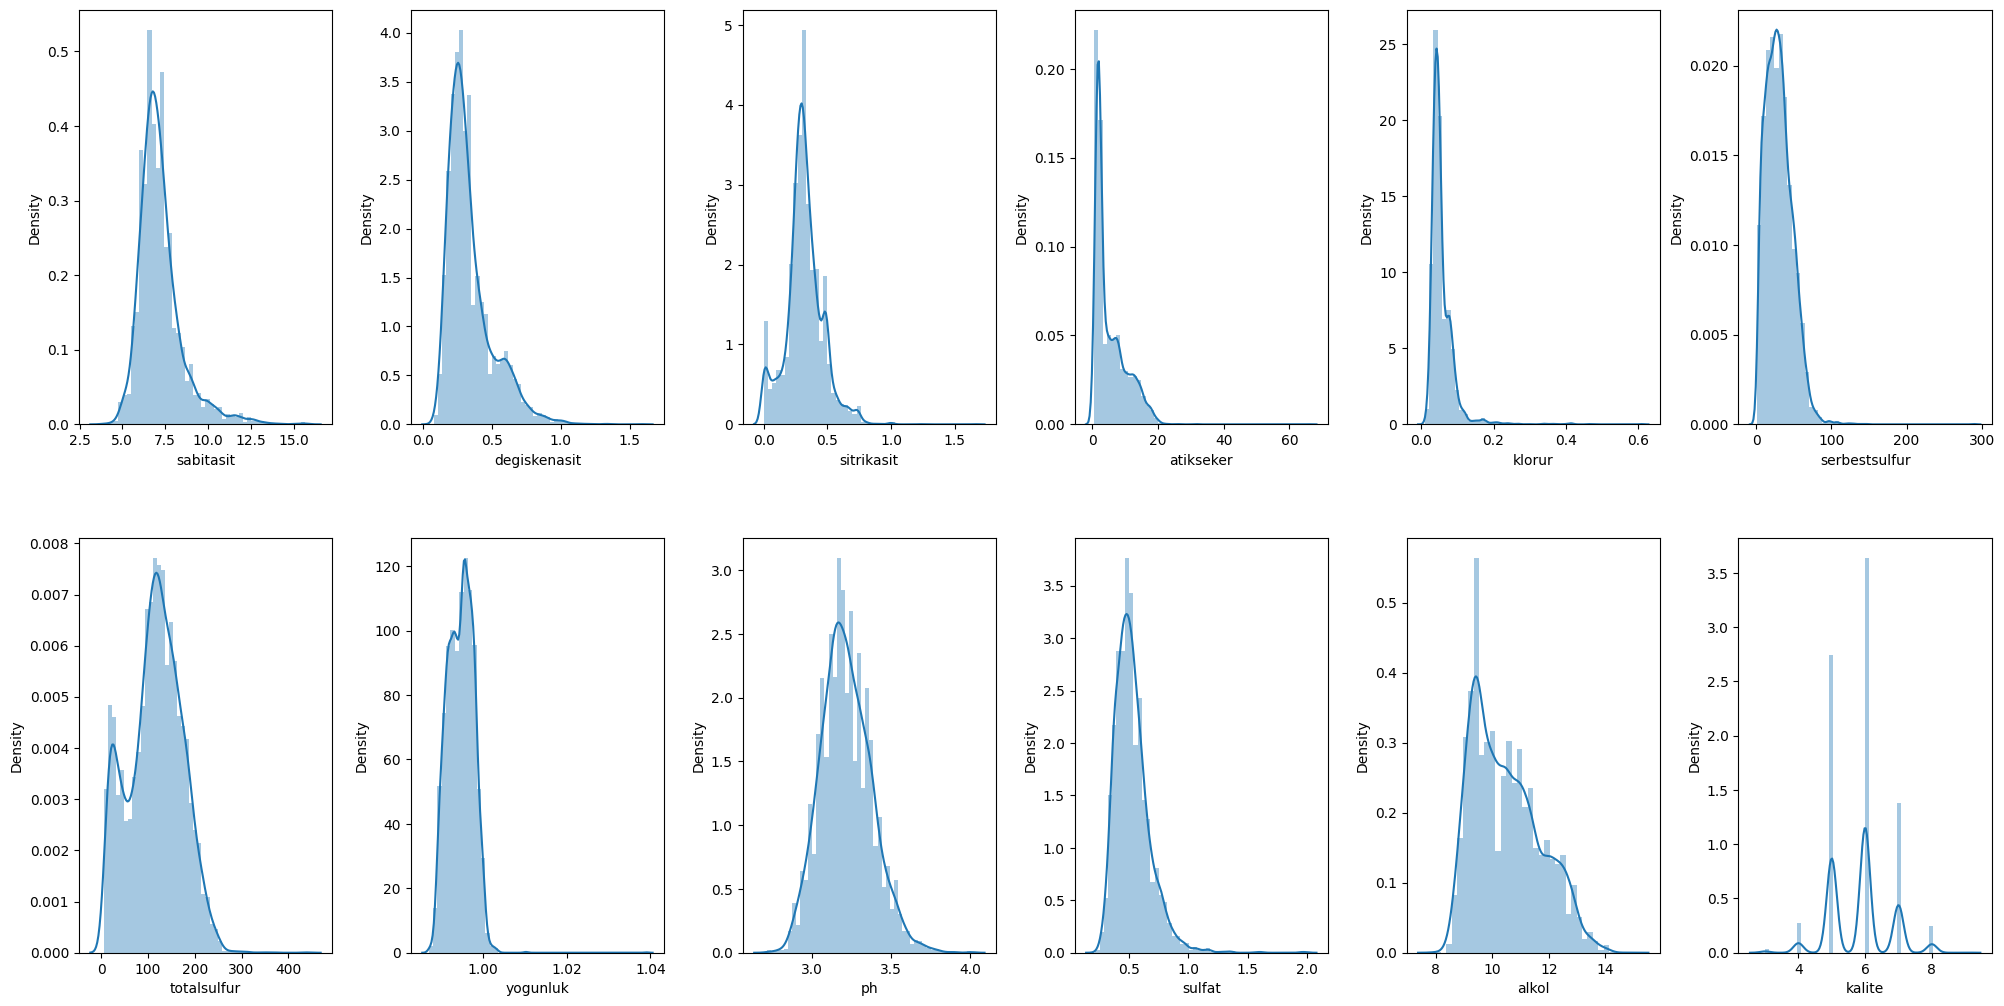

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in rw.items():
    if col != 'tip':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

logTransformation

In [ ]:
rw["serbestsulfur"] = np.log( 1 + rw['serbestsulfur'])

<ipython-input-7-ea7881ec6954>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rw['serbestsulfur'])


<Axes: xlabel='serbestsulfur', ylabel='Density'>

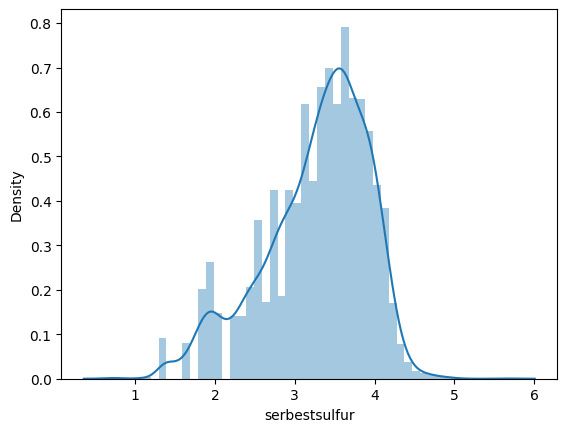

In [ ]:
sns.distplot(rw['serbestsulfur'])

denemeregression

<Axes: >

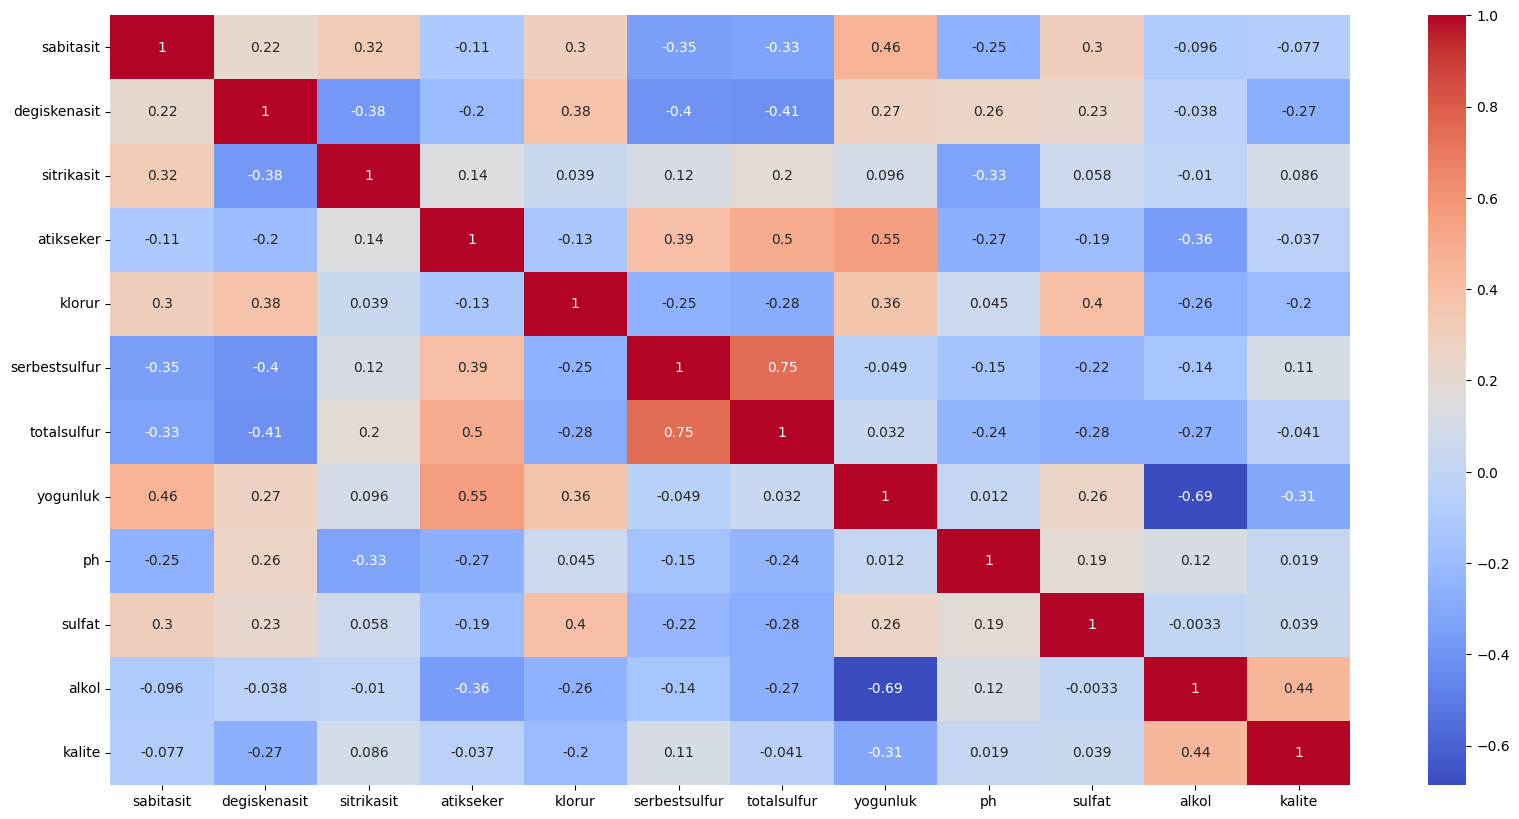

In [ ]:
corr = rw.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
rw['kalite'] = pd.cut(rw['kalite'], bins=bins, labels=labels)

In [ ]:
rw.head(15)

,sabitasit,degiskenasit,sitrikasit,atikseker,klorur,serbestsulfur,totalsulfur,yogunluk,ph,sulfat,alkol,kalite
0,7.0,0.27,0.36,20.70,0.045,3.828641,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.60,0.049,2.708050,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.90,0.050,3.433987,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.50,0.058,3.871201,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.50,0.058,3.871201,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.90,0.050,3.433987,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.00,0.045,3.433987,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.70,0.045,3.828641,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.60,0.049,2.708050,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.50,0.044,3.367296,129.0,0.9938,3.22,0.45,11.0,1


K Nearest Neighbors Classifier Trying

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import pandas as pd

# KNN modeli oluşturma
knn = KNeighborsClassifier(n_neighbors=3)  # Komşu sayısını 3 olarak ayarladık

# Modeli eğitme
knn.fit(x_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = knn.predict(x_test)

# Sınıflandırma doğruluğunu hesaplama ve yazdırma
accuracy = accuracy_score(y_test, y_pred)
print("Test verileri doğruluğu:", accuracy)

# Sınıflandırma raporunu yazdırma
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karışıklık matrisini yazdırma
#.print("\nKarışıklık Matrisi:")
#print(confusion_matrix(y_test, y_pred))

# Belirli bir örneğe göre tahmin yapma
example = [[7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]]
prediction = knn.predict(example)
print("\nÖrnek için Tahmin:", prediction)

# Eğitim verileri üzerinde tahmin yapma
y_train_pred = knn.predict(x_train)

# Eğitim ve test verileri üzerinde MSE hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred)

# Eğitim ve test verileri üzerinde R2 hesaplama
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

# KNN sınıflandırıcının sonuçlarını DataFrame'e kaydetme
knn_results = pd.DataFrame([['KNN Classifier', accuracy, train_mse, train_r2, test_mse, test_r2]], columns=['Method', 'Test Score', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
knn_results


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test verileri doğruluğu: 0.8093894821680435

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         3.0       0.85      0.98      0.91       690
         4.0       0.80      0.93      0.86       706
         5.0       0.67      0.60      0.63       739
         6.0       0.59      0.38      0.46       670
         7.0       0.78      0.80      0.79       702
         8.0       0.91      0.96      0.93       743
         9.0       0.96      1.00      0.98       713

    accuracy                           0.81      4963
   macro avg       0.79      0.81      0.79      4963
weighted avg       0.79      0.81      0.80      4963


Örnek için Tahmin: [5.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Method,Test Score,Training MSE,Training R2,Test MSE,Test R2
0,KNN Classifier,0.809389,0.303848,0.924022,0.558936,0.860334


ANN Classifier Trying

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Yapay Sinir Ağı modeli oluşturma
model = Sequential()

# Modelin katmanlarını ekleme
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))  # Giriş katmanı
model.add(Dense(units=64, activation='relu'))  # Gizli katman
model.add(Dense(units=1, activation='linear'))  # Çıkış katmanı

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Eğitim ve test verileri üzerinde tahmin yapma
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Eğitim ve test verileri üzerinde MSE ve R2 hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Modelin sonuçlarını DataFrame'e kaydetme
ann_results = pd.DataFrame([['Artificial Neural Network', None, train_mse, train_r2, test_mse, test_r2]], columns=['Method', 'Test Score', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
ann_results


Epoch 1/10
373/373 [==============================] - 3s 5ms/step - loss: 4.3241 - val_loss: 1.8318
Epoch 2/10
373/373 [==============================] - 2s 4ms/step - loss: 1.8380 - val_loss: 1.8449
Epoch 3/10
373/373 [==============================] - 1s 4ms/step - loss: 1.7313 - val_loss: 1.8721
Epoch 4/10
373/373 [==============================] - 2s 5ms/step - loss: 1.6542 - val_loss: 1.5168
Epoch 5/10
373/373 [==============================] - 2s 6ms/step - loss: 1.5680 - val_loss: 1.5423
Epoch 6/10
373/373 [==============================] - 3s 8ms/step - loss: 1.5701 - val_loss: 1.4405
Epoch 7/10
373/373 [==============================] - 2s 6ms/step - loss: 1.5036 - val_loss: 1.4930
Epoch 8/10
373/373 [==============================] - 1s 3ms/step - loss: 1.5193 - val_loss: 1.6344
Epoch 9/10
373/373 [==============================] - 2s 4ms/step - loss: 1.4765 - val_loss: 1.8158
Epoch 10/10
156/156 [==============================] - 0s 2ms/step


,Method,Test Score,Training MSE,Training R2,Test MSE,Test R2
0,Artificial Neural Network,None,1.322498,0.669305,1.382874,0.654451


**LinearRegression**

In [ ]:
lm = LinearRegression()
newmodel = lm.fit(x_train,y_train)

# print(newmodel.score(x_test,y_test))
# print(newmodel.score(x_train,y_train))

lrTestScore = newmodel.score(x_test,y_test)
lrTrainScore = newmodel.score(x_train,y_train)

y_lr_train_pred = newmodel.predict(x_train)
y_lr_test_pred = newmodel.predict(x_test)

# print(y_lr_train_pred)
# print(y_lr_test_pred)

lr_train_mse = mean_squared_error(y_train , y_lr_train_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred )
lr_train_mape = mean_absolute_percentage_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train , y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
lr_test_mae = mean_absolute_error(y_test , y_lr_test_pred)
lr_test_mape =  mean_absolute_percentage_error(y_test , y_lr_test_pred)
lr_test_r2 = r2_score(y_test , y_lr_test_pred)

lr_results = pd.DataFrame(['Linear Regression' ,lrTestScore,  lr_train_mse,  lr_train_r2 , lr_test_mse ,  lr_test_r2]).transpose()
lr_results.columns = ['Method' ,"Test Score" , 'Training MSE' , 'Training R2' , 'Test MSE' , 'Test R2']

print(lr_results)

prediction = newmodel.predict([[7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]])[0][0]

print("Tahmin:", prediction)

              Method Test Score Training MSE Training R2  Test MSE   Test R2
0  Linear Regression   0.512458     1.922103    0.519371  1.951123  0.512458
Tahmin: 3.4469063699569347


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**LogisticRegression**

In [ ]:
lr = LogisticRegression(max_iter=400)
logModel = lr.fit(x_train , y_train)
print(logModel.score(x_test,y_test))
print(logModel.score(x_train,y_train))
logTestScore  = logModel.score(x_test,y_test)
logTrainScore = logModel.score(x_train,y_train)

y_log_train_pred = logModel.predict(x_train)
y_log_test_pred = logModel.predict(x_test)

log_train_mse = mean_squared_error(y_train , y_log_train_pred)
log_train_mae = mean_absolute_error(y_train, y_log_train_pred )
log_train_mape = mean_absolute_percentage_error(y_train, y_log_train_pred)
log_train_r2 = r2_score(y_train , y_log_train_pred)


log_test_mse = mean_squared_error(y_test , y_log_test_pred)
log_test_mae = mean_absolute_error(y_test , y_log_test_pred)
log_test_mape =  mean_absolute_percentage_error(y_test , y_log_test_pred)
log_test_r2 = r2_score(y_test , y_log_test_pred)

log_results = pd.DataFrame(['Logistic Regression' ,logTestScore, log_train_mse,  log_train_r2 , log_test_mse ,  log_test_r2]).transpose()
log_results.columns =['Method' ,"Test Score" , 'Training MSE' , 'Training R2' , 'Test MSE' , 'Test R2']

print(log_results)


prediction = logModel.predict([[7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]])

print("Tahmin:", prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.39814628249042916
0.3965343542212372
                Method Test Score Training MSE Training R2 Test MSE   Test R2
0  Logistic Regression   0.398146     3.281886    0.179353   3.3514  0.162561
Tahmin: [4.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


randomForestRegressor


In [ ]:
rf = RandomForestRegressor(max_depth = 5, n_estimators=200)
forestModel = rf.fit(x_train , y_train)

print(forestModel.score(x_test,y_test))
# print(forestModel.score(x_train,y_train))

rfTestScore = forestModel.score(x_test,y_test)
rfTrainScore = forestModel.score(x_train,y_train)

y_rf_train_pred = forestModel.predict(x_train)
y_rf_test_pred = forestModel.predict(x_test)

rf_train_mse = mean_squared_error(y_train , y_rf_train_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred )
rf_train_mape = mean_absolute_percentage_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train , y_rf_train_pred)


rf_test_mse = mean_squared_error(y_test , y_rf_test_pred)
rf_test_mae = mean_absolute_error(y_test , y_rf_test_pred)
rf_test_mape =  mean_absolute_percentage_error(y_test , y_rf_test_pred)
rf_test_r2 = r2_score(y_test , y_rf_test_pred)

rf_results = pd.DataFrame(['Random Forest Regressor' ,rfTestScore, rf_train_mse, rf_train_r2 , rf_test_mse , rf_test_r2]).transpose()
rf_results.columns =['Method' ,"Test Score" , 'Training MSE' ,'Training R2' , 'Test MSE' , 'Test R2']

print(rf_results)

prediction = forestModel.predict([[7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]])

print("Tahmin:", prediction)

<ipython-input-15-017bd5a46f95>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forestModel = rf.fit(x_train , y_train)


0.7582405493914615
                    Method Test Score Training MSE Training R2  Test MSE  \
0  Random Forest Regressor   0.758241     0.903675    0.774033  0.967512   

    Test R2  
0  0.758241  
Tahmin: [4.460002]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


decisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=10)
dtModel = dtc.fit(x_train,y_train)

dtcTestScore = dtModel.score(x_test,y_test)
dtcTrainScore = dtModel.score(x_train,y_train)

y_dtc_train_pred = dtModel.predict(x_train)
y_dtc_test_pred = dtModel.predict(x_test)

dtc_train_mse = mean_squared_error(y_train , y_dtc_train_pred)
dtc_train_mae = mean_absolute_error(y_train, y_dtc_train_pred )
dtc_train_mape = mean_absolute_percentage_error(y_train, y_dtc_train_pred)
dtc_train_r2 = r2_score(y_train , y_dtc_train_pred)

dtc_test_mse = mean_squared_error(y_test , y_dtc_test_pred)
dtc_test_mae = mean_absolute_error(y_test , y_dtc_test_pred)
dtc_test_mape =  mean_absolute_percentage_error(y_test , y_dtc_test_pred)
dtc_test_r2 = r2_score(y_test , y_dtc_test_pred)

dtc_results = pd.DataFrame(['Decision Tree Classifier' ,dtcTestScore, dtc_train_mse,  dtc_train_r2 , dtc_test_mse ,  dtc_test_r2]).transpose()
dtc_results.columns =['Method' ,"Test Score" , 'Training MSE' , 'Training R2' , 'Test MSE' , 'Test R2']

print(dtc_results)

prediction = dtModel.predict([[7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]])
print("Tahmin:", prediction)

report = classification_report(y_test,y_dtc_test_pred)
print(report)



                     Method Test Score Training MSE Training R2  Test MSE  \
0  Decision Tree Classifier   0.666331     0.662032    0.834456  0.836188   

    Test R2  
0  0.791056  
Tahmin: [5.]
              precision    recall  f1-score   support

         3.0       0.86      0.78      0.82       690
         4.0       0.60      0.59      0.60       706
         5.0       0.46      0.56      0.51       739
         6.0       0.41      0.31      0.35       670
         7.0       0.57      0.61      0.59       702
         8.0       0.78      0.79      0.78       743
         9.0       0.99      1.00      0.99       713

    accuracy                           0.67      4963
   macro avg       0.67      0.66      0.66      4963
weighted avg       0.67      0.67      0.66      4963



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**randomforestclassfier**

In [ ]:
rfc=RandomForestClassifier(n_estimators = 400 ,max_depth=10)
rfcModel = rfc.fit(x_train, y_train)

rfcTestScore = rfcModel.score(x_test,y_test)
rfcTrainScore = rfcModel.score(x_train,y_train)
print(rfcModel.score(x_test,y_test))
# print(rfcModel.score(x_train,y_train))

y_rfc_train_pred = rfcModel.predict(x_train)
y_rfc_test_pred = rfcModel.predict(x_test)

rfc_train_mse = mean_squared_error(y_train , y_rfc_train_pred)
rfc_train_mae = mean_absolute_error(y_train, y_rfc_train_pred )
rfc_train_mape = mean_absolute_percentage_error(y_train, y_rfc_train_pred)
rfc_train_r2 = r2_score(y_train , y_rfc_train_pred)

rfc_test_mse = mean_squared_error(y_test , y_rfc_test_pred)
rfc_test_mae = mean_absolute_error(y_test , y_rfc_test_pred)
rfc_test_mape =  mean_absolute_percentage_error(y_test , y_rfc_test_pred)
rfc_test_r2 = r2_score(y_test , y_rfc_test_pred)

rfc_results = pd.DataFrame(['Random Forest Classifier' ,rfcTestScore, rfc_train_mse,  rfc_train_r2 , rfc_test_mse ,  rfc_test_r2]).transpose()
rfc_results.columns =['Method' ,"Test Score" , 'Training MSE' ,'Training R2' , 'Test MSE' ,'Test R2']

print(rfc_results)

prediction = dtModel.predict([[7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]])
print("Tahmin:", prediction)

report = classification_report(y_test,y_rfc_test_pred)
print(report)



<ipython-input-17-65cec0d532c7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcModel = rfc.fit(x_train, y_train)


0.7975015111827524
                     Method Test Score Training MSE Training R2  Test MSE  \
0  Random Forest Classifier   0.797502     0.249446    0.937625  0.424139   

    Test R2  
0  0.894017  
Tahmin: [5.]
              precision    recall  f1-score   support

         3.0       0.97      0.96      0.96       690
         4.0       0.77      0.88      0.82       706
         5.0       0.64      0.64      0.64       739
         6.0       0.58      0.45      0.51       670
         7.0       0.73      0.74      0.73       702
         8.0       0.86      0.90      0.88       743
         9.0       0.99      1.00      0.99       713

    accuracy                           0.80      4963
   macro avg       0.79      0.80      0.79      4963
weighted avg       0.79      0.80      0.79      4963



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


GENEL **TABLO**

In [ ]:
df_models  = pd.concat([lr_results , log_results,dtc_results , rf_results, rfc_results, knn_results,ann_results], axis = 0)
df_models

,Method,Test Score,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.512458,1.922103,0.519371,1.951123,0.512458
0,Logistic Regression,0.398146,3.281886,0.179353,3.3514,0.162561
0,Decision Tree Classifier,0.666331,0.662032,0.834456,0.836188,0.791056
0,Random Forest Regressor,0.758241,0.903675,0.774033,0.967512,0.758241
0,Random Forest Classifier,0.797502,0.249446,0.937625,0.424139,0.894017
0,KNN Classifier,0.809389,0.303848,0.924022,0.558936,0.860334
0,Artificial Neural Network,None,1.322498,0.669305,1.382874,0.654451


**DECISION TREE Görselleştirme**

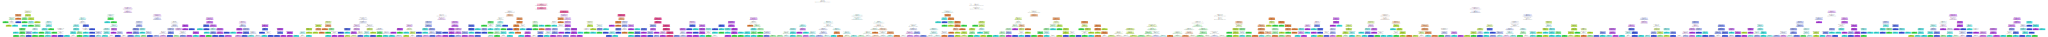

In [ ]:
dot = export_graphviz(dtModel , feature_names=x_test.columns , filled=True)
gorsel  = graphviz.Source(dot)
gorsel

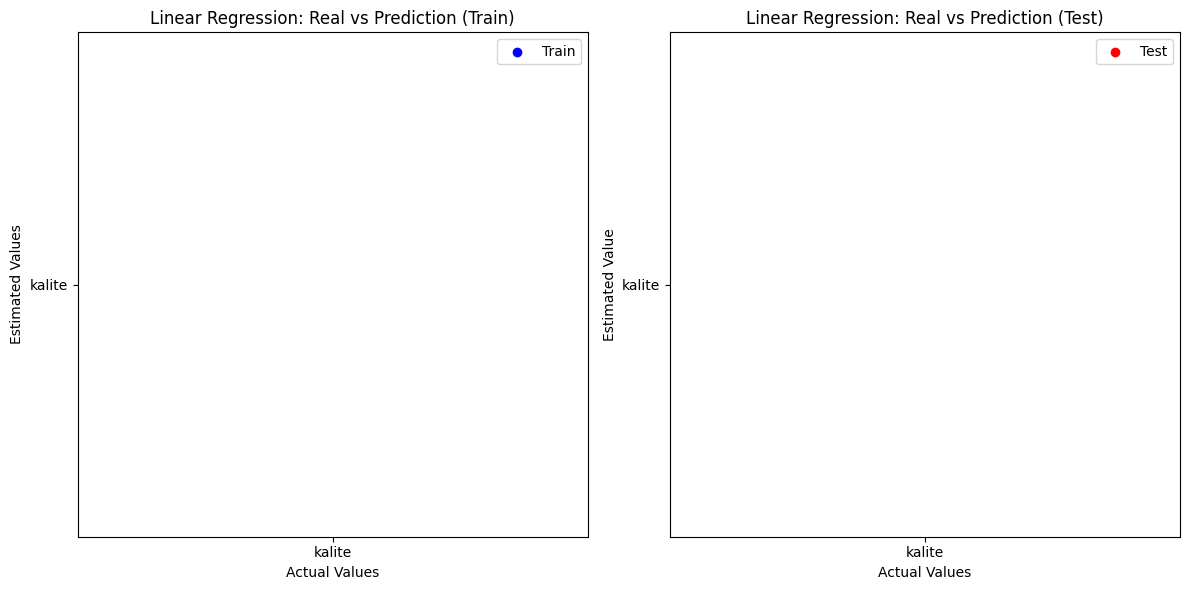

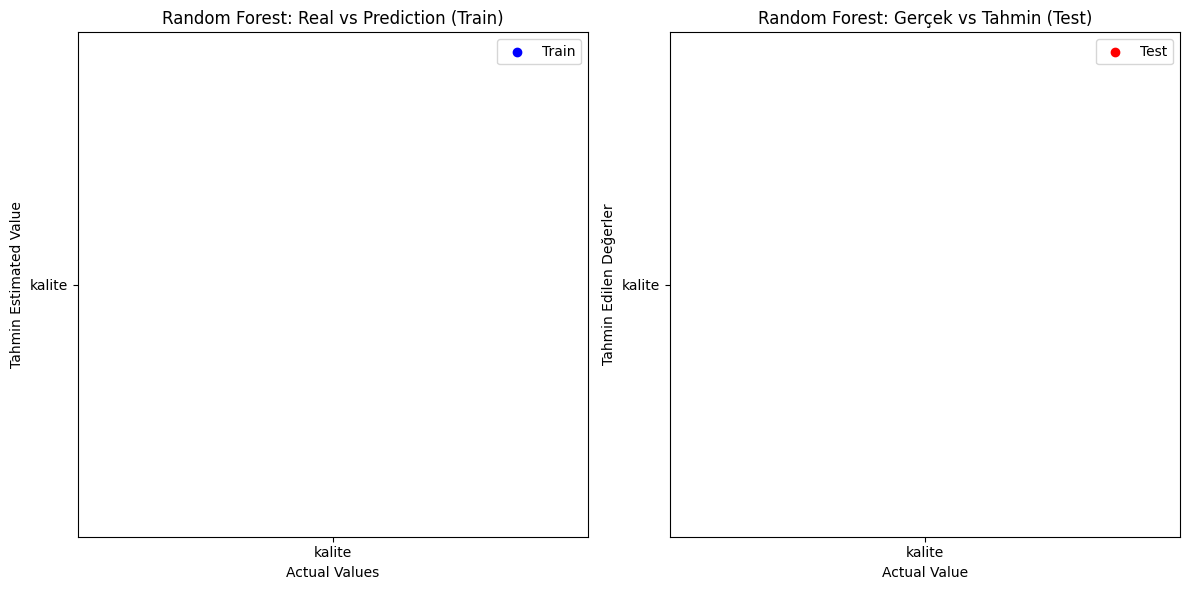

In [ ]:
# Visualization for Linear Regression
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_lr_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
plt.title('Linear Regression: Real vs Prediction (Train)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_lr_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Estimated Value')
plt.title('Linear Regression: Real vs Prediction (Test)')
plt.legend()

plt.tight_layout()
plt.show()

# Visualization for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_rf_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Tahmin Estimated Value')
plt.title('Random Forest: Real vs Prediction (Train)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_rf_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Value')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek vs Tahmin (Test)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model = LinearRegression()
classify(model,x,y)

Accuracy: 49.25903698680021
   Training MSE  Training R2  Test MSE  Test R2
0      1.902792     0.525833  2.009705  0.49259


In [ ]:
model = LogisticRegression()
classify(model,x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 30.32440056417489
   Training MSE  Training R2  Test MSE   Test R2
0      4.625764    -0.152718  4.788233 -0.208932


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 80.33447511585734
   Training MSE  Training R2  Test MSE   Test R2
0           0.0          1.0  0.450131  0.886351


In [ ]:
model = RandomForestClassifier()
classify(model,x,y)

<ipython-input-4-907b19aa6c2b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Accuracy: 88.45456377191215
   Training MSE  Training R2  Test MSE   Test R2
0           0.0          1.0  0.187991  0.952536


In [ ]:
model = RandomForestRegressor()
classify(model,x,y)

<ipython-input-4-907b19aa6c2b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Accuracy: 95.07802228044957
   Training MSE  Training R2  Test MSE  Test R2
0      0.028432     0.992915  0.194945  0.95078
